In [105]:
import yfinance as yf
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [272]:
dataset=yf.Ticker('TCS.NS')

In [273]:
dataset.info

{'zip': '400001',
 'sector': 'Technology',
 'fullTimeEmployees': 469261,
 'longBusinessSummary': 'Tata Consultancy Services Limited provides information technology (IT) and IT enabled services worldwide. It operates through Banking, Financial Services and Insurance; Manufacturing; Retail and Consumer Business; Communication, Media and Technology; and Others segments. The company offers CHROMA, a cloud-based talent management solution; ignio, a cognitive automation software product; iON, an assessment platform; TAP, a procurement offering; TCS MasterCraft, a platform to automate and manage IT processes; and Quartz, a blockchain solution. It also provides customer intelligence and insight solutions to deliver retail, banking, and communications experiences; Intelligent Urban Exchange, an integrated software to accelerate smart city programs; OPTUMERA, a digital merchandising suite; TCS BaNCS, a financial platform; and Jile, an agile DevOps product. In addition, the company offers advance

In [274]:
his_data=dataset.history(period='36mo',interval='1d')

In [275]:
his_data.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

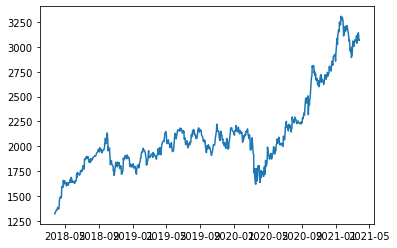

In [276]:
plt.plot(his_data['Close'])
plt.show()

In [277]:
import statsmodels.api as sts

In [278]:
ar=sts.tsa.AR(his_data['Close'])
ar=ar.fit(maxlag=5,method='cmle')

c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECA

In [279]:
pre=ar.predict()

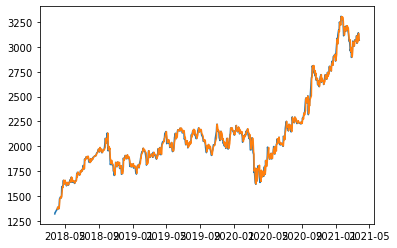

In [281]:
plt.plot(his_data['Close'])

plt.plot(pre)

plt.show()

In [282]:
ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      C  -                  l                  o
Model:                          AR(5)   Log Likelihood               -3691.309
Method:                          cmle   S.D. of innovations             36.717
Date:                Sat, 27 Mar 2021   AIC                              7.226
Time:                        12:43:50   BIC                              7.269
Sample:                             0   HQIC                             7.242
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5317      7.289      1.033      0.301      -6.755      21.819
L1.Close       0.9587      0.037     25.889      0.000       0.886       1.031
L2.Close      -0.0084      0.051     -0.164      0.870      -0.109       0.092
L3.Close       0.0322      0.051      0.628      0.530      -0.068       0.133
L4.Close       0.0311      0.051      0.605      0.545      -0.070       0.132
L5.Close      -0.0160      0.037     -0.430      0.667      -0.089       0.057
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0022           -0.0000j            1.0022           -0.0000
AR.2           -2.7646           -0.0000j            2.7646           -0.5000
AR.3            0.1141           -2.5455j            2.5480           -0.2429
AR.4            0.1141           +2.5455j            2.5480            0.2429
AR.5            3.4786           -0.0000j            3.4786           -0.0000
-----------------------------------------------------------------------------
"""

In [283]:
arima=sts.tsa.SARIMAX(his_data['Close'],order=(1,1,1))
arima=arima.fit()

c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [284]:
fc=arima.forecast(steps=300)

c:\users\revei\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


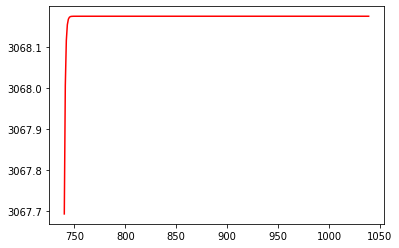

In [285]:


plt.plot(fc,c='red')

plt.show()

In [288]:
fc,his_data.dropna()

(740     3067.693892
 741     3068.006508
 742     3068.115843
 743     3068.154083
 744     3068.167457
            ...     
 1035    3068.174650
 1036    3068.174650
 1037    3068.174650
 1038    3068.174650
 1039    3068.174650
 Name: predicted_mean, Length: 300, dtype: float64,
                    Open         High          Low        Close   Volume  \
 Date                                                                      
 2018-03-26  1320.060569  1323.994013  1302.523781  1319.124023  2964210   
 2018-03-27  1322.870476  1340.664840  1321.957367  1333.500244  2494574   
 2018-03-28  1327.974100  1346.283602  1322.869974  1334.178711  6865654   
 2018-04-02  1329.894257  1364.546431  1329.894257  1362.509399  1662988   
 2018-04-03  1354.291171  1371.991783  1354.291171  1363.258545  1937290   
 ...                 ...          ...          ...          ...      ...   
 2021-03-22  3048.699951  3139.449951  3018.649902  3129.649902  2821646   
 2021-03-23  3140.000000  3169.00

In [270]:
df1=dataset.balancesheet

In [271]:
df1

,2020-03-31,2019-03-31,2018-03-31,2017-03-31
Intangible Assets,2.730000e+09,2.401100e+09,2.264400e+09,2.107300e+09
Capital Surplus,1.409400e+09,1.407200e+09,1.407200e+09,1.407200e+09
Total Liab,6.876640e+10,5.631020e+10,4.436150e+10,4.149160e+10
Total Stockholder Equity,6.668750e+10,6.070150e+10,5.089880e+10,4.232380e+10
Minority Interest,4.400000e+07,1.408000e+08,-1.820000e+07,2.636000e+08
Other Current Liab,2.184000e+10,1.889850e+10,1.475130e+10,1.059200e+10
Total Assets,1.354979e+11,1.171525e+11,9.524210e+10,8.407900e+10
Common Stock,8.878000e+08,8.878000e+08,8.878000e+08,8.878000e+08
Other Current Assets,6.466800e+09,3.933500e+09,5.432600e+09,4.784500e+09
Retained Earnings,6.657010e+10,5.824700e+10,4.857690e+10,4.005410e+10
